<a href="https://colab.research.google.com/github/GabrielBatistaadm/Primeiro_Projeto-/blob/main/Projeto_Analisando_os_Dados_do_Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ***Início da Jornada em Data Science***

#### **Gabriel Batista**

---

# Análise dos Dados do Airbnb - *Berlin, Alemanha*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade de Berlin na Alemanha, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados


In [1]:
# importar os pacotes necessarios
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("/content/listings (1).csv")

## Análise dos Dados


**Dicionário das variáveis do DataFrame**

* **`id`** - número de id gerado para identificar o imóvel
* **`name`** - nome da propriedade anunciada
* **`host_id`** - número de id do proprietário (anfitrião) da propriedade
* **`host_name`** - Nome do anfitrião
* **`neighbourhood_group`** - esta coluna não contém nenhum valor válido
* **`neighbourhood`** - nome do bairro
* **`latitude`** - coordenada da latitude da propriedade
* **`longitude`** - coordenada da longitude da propriedade
* **`room_type`** - informa o tipo de quarto que é oferecido
* **`price`** - preço para alugar o imóvel
* **`minimum_nights`** - quantidade mínima de noites para reservar
* **`number_of_reviews`** - número de reviews que a propriedade possui
* **`last_review`** - data do último review
* **`reviews_per_month`** - quantidade de reviews por mês
* **`calculated_host_listings_count`** - quantidade de imóveis do mesmo anfitrião
* **`availability_365`** - número de dias de disponibilidade dentro de 365 dias

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [4]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,652868795892201022,Kleine Auszeit? Oder Business-Trip? Alles mögl...,21708794,Familie Sek,Tempelhof - Schöneberg,Lichtenrade,52.357652,13.399098,Entire home/apt,88,1,0,NaN,NaN,1,6,0,NaN
1,27080612,Apartment with Living/Sleeping Room & own Kitchen,130216168,Tommy,Marzahn - Hellersdorf,Mahlsdorf,52.520060,13.659560,Entire home/apt,60,2,126,2022-09-11,2.54,2,163,18,NaN
2,29077694,Wohnung im Grünen nah an der Metropole,219116245,Tilmann,Steglitz - Zehlendorf,Zehlendorf Südwest,52.412320,13.207150,Entire home/apt,36,8,29,2022-05-29,0.63,1,6,6,NaN
3,665648367391379321,Schöne Eigentumswohnung mit Balkon,106965422,Paul,Steglitz - Zehlendorf,Drakestr.,52.402144,13.273865,Entire home/apt,120,1,0,NaN,NaN,1,257,0,"Available with a mobility lease only (""bail mo..."
4,37738004,Remise Villa Erica Superior Apartment,42048631,Archibald,Steglitz - Zehlendorf,Drakestr.,52.410150,13.292070,Entire home/apt,110,5,1,2019-10-26,0.03,8,160,0,NaN


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

In [ ]:
# identificar o volume de dados do DataFrame
print("As entradas são:\t{}".format(df.shape[0]))
print("As variáveis são:\t{}\n".format(df.shape[1]))


# verificar as 5 primeiras entradas do dataset
df.dtypes.head()

As entradas são:	16680
As variáveis são:	18



id                      int64
name                   object
host_id                 int64
host_name              object
neighbourhood_group    object
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

In [ ]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes

(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)


license                           0.662350
reviews_per_month                 0.171942
last_review                       0.171942
name                              0.001199
host_name                         0.000959
minimum_nights                    0.000000
number_of_reviews_ltm             0.000000
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
id                                0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
neighbourhood_group               0.000000
host_id                           0.000000
price                             0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 

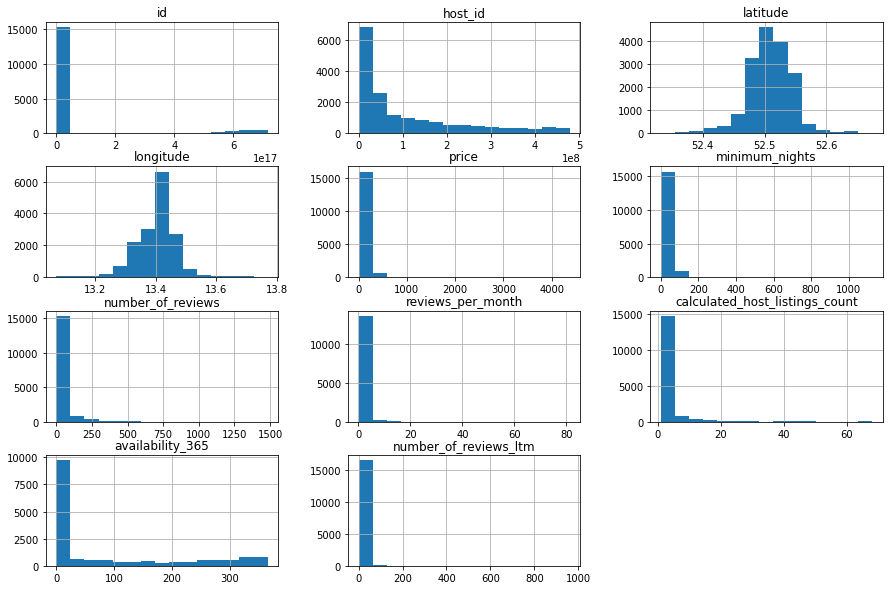

In [ ]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15,figsize=(15,10));

### **Q4. Qual a média dos preços de aluguel?**

In [ ]:
# ver a média da coluna `price``

print("A média de preço dos aluguel são:\t{}".format(df.price.mean().round(2)))

A média de preço dos aluguel são:	96.31


### **Q5. Qual a correlação existente entre as variáveis**

In [ ]:
# criar uma matriz de correlação

corr = df[['price','availability_365','calculated_host_listings_count']].corr ()

# mostrar a matriz de correlação

corr

,price,availability_365,calculated_host_listings_count
price,1.000000,0.333116,0.210294
availability_365,0.333116,1.000000,0.330527
calculated_host_listings_count,0.210294,0.330527,1.000000


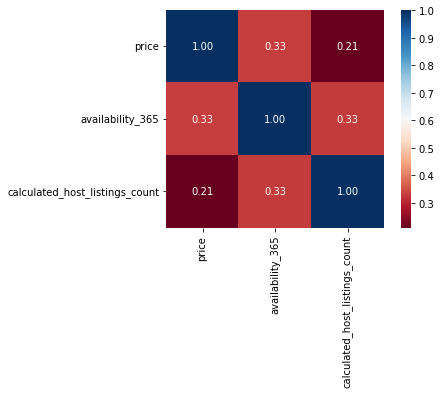

In [ ]:
# plotar um heatmap a partir das correlações

sns.heatmap(corr,cmap='RdBu', fmt='.2f',square=True,linecolor='white',annot=True);

### **Q6. Qual o tipo de imóvel mais alugado no Airbnb?**

In [ ]:
# mostrar a quantidade de cada tipo de imóvel disponível

df.room_type.value_counts()

Entire home/apt    9904
Private room       6438
Shared room         192
Hotel room          146
Name: room_type, dtype: int64

In [ ]:
# mostrar a porcentagem de cada tipo de imóvel disponível

df.room_type.value_counts() / df.shape[0]

Entire home/apt    0.593765
Private room       0.385971
Shared room        0.011511
Hotel room         0.008753
Name: room_type, dtype: float64

### **Q7. Qual a localidade mais cara do dataset?**



In [ ]:
# ver preços por bairros, na média

df.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Marzahn-Süd                270.840000
Marzahn-Nord               227.333333
Haselhorst                 183.100000
Rummelsburger Bucht        174.333333
Spandau Mitte              171.360000
Kurfürstendamm             167.067227
Alexanderplatz             156.153682
Regierungsviertel          153.491620
Brunnenstr. Süd            143.896063
Prenzlauer Berg Südwest    140.843091
Name: price, dtype: float64

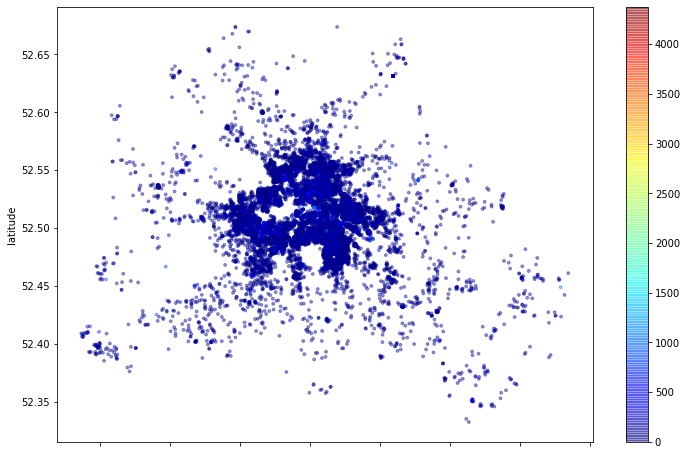

In [ ]:
# plotar os imóveis pela latitude-longitude

df.plot(kind="scatter",x='longitude',y='latitude',alpha=0.4,c=df['price'],s=8,cmap=plt.get_cmap('jet'),figsize=(12,8));


### **Q8. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [ ]:
# ver a média da coluna `minimum_nights``



print("A média da coluna é:\t{}".format(df.minimum_nights.mean().round(2)))
                                                             

A média da coluna é:	12.12


## Conclusões



Esse projeto foi de fundamental importância, pois serviu para colocar em prática, os ensinamento do professor Carlos e toda sua equipe. A análise ocorreu na cidade de Berlin na Alemanha, onde foi possível identificar que o percentual de valores ausentes para cada coluna, foram abaixo de 1%. Os 10 bairros mais caros, na média, apresentou preços com crescimento de valor sem grande escala, se comparado, antecessor com sucessor. 

Podemos identificar que a maior parte dos imóveis tem sua localidade próximas um dos outros, oque nos permite a ter menos distorções estatísticas.

Em alguma das partes do projeto, usei a função print, para treinar inserção de texto nas respostas, para ajudar na memorização, de fato conforme o professor disse, a prática é o nosso maior aliado no aprendizado.